In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

In [23]:
df = pd.read_csv("../data/DSNY_Monthly_Tonnage_Data.csv")
# changing month to datetime for pandas
df['MONTH'] = pd.to_datetime(df['MONTH'])
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24647 entries, 0 to 24646
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   MONTH                24647 non-null  datetime64[ns]
 1   BOROUGH              24647 non-null  object        
 2   COMMUNITYDISTRICT    24647 non-null  int64         
 3   REFUSETONSCOLLECTED  24647 non-null  float64       
 4   PAPERTONSCOLLECTED   22213 non-null  float64       
 5   MGPTONSCOLLECTED     22570 non-null  float64       
 6   RESORGANICSTONS      3095 non-null   float64       
 7   SCHOOLORGANICTONS    2308 non-null   float64       
 8   LEAVESORGANICTONS    881 non-null    object        
 9   XMASTREETONS         1685 non-null   float64       
 10  OTHERORGANICSTONS    1933 non-null   float64       
 11  BOROUGH_ID           24647 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 2.3+ MB


/var/folders/3y/ldxff8k17wjcyzkq19xw1srm0000gn/T/ipykernel_60371/2461424894.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['MONTH'] = pd.to_datetime(df['MONTH'])


,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,OTHERORGANICSTONS,BOROUGH_ID
0,2025-10-01,Bronx,1,3352.0,235.0,124.8,16.7,85.9,NaN,NaN,NaN,2
1,2025-10-01,Bronx,2,7942.4,231.6,213.8,20.4,100.7,NaN,NaN,NaN,2
2,2025-10-01,Bronx,3,2348.6,140.1,147.5,19.1,NaN,NaN,NaN,NaN,2
3,2025-10-01,Bronx,4,4210.4,233.3,291.1,20.8,70.7,NaN,NaN,0.3,2
4,2025-10-01,Bronx,5,3578.3,216.6,299.9,17.1,85.6,NaN,NaN,NaN,2


In [28]:
newdata = df[(df['MONTH'] >= '2022-01-01')]

recycles = newdata['PAPERTONSCOLLECTED'] + newdata['MGPTONSCOLLECTED']
total = newdata['PAPERTONSCOLLECTED'] + newdata['MGPTONSCOLLECTED'] + newdata['REFUSETONSCOLLECTED']

newdata['proportionrefuse'] = recycles / total

# creating identifier
newdata['id'] = newdata['BOROUGH'] + newdata['COMMUNITYDISTRICT'].astype(str)

# data for model
modeldata = newdata[['MONTH','id','proportionrefuse','REFUSETONSCOLLECTED','PAPERTONSCOLLECTED','MGPTONSCOLLECTED']]

#cleaning id
modeldata['id'] = modeldata['id'].str.lower().str.strip()
modeldata['id'] = modeldata['id'].str.replace(' ','')
modeldata.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2714 entries, 0 to 2713
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   MONTH                2714 non-null   datetime64[ns]
 1   id                   2714 non-null   object        
 2   proportionrefuse     2714 non-null   float64       
 3   REFUSETONSCOLLECTED  2714 non-null   float64       
 4   PAPERTONSCOLLECTED   2714 non-null   float64       
 5   MGPTONSCOLLECTED     2714 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 148.4+ KB


/var/folders/3y/ldxff8k17wjcyzkq19xw1srm0000gn/T/ipykernel_60371/3036959676.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['proportionrefuse'] = recycles / total
/var/folders/3y/ldxff8k17wjcyzkq19xw1srm0000gn/T/ipykernel_60371/3036959676.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['id'] = newdata['BOROUGH'] + newdata['COMMUNITYDISTRICT'].astype(str)
/var/folders/3y/ldxff8k17wjcyzkq19xw1srm0000gn/T/ipykernel_60371/3036959676.py:15: SettingWithCopyWarning: 
A value is trying to be

In [32]:
# user input to filter our timeseries for a

attempts = 0
max_attempts = 100000
listofunique = []

for i in range(len(modeldata['id'].unique())):
    listofunique.append(modeldata['id'].iloc[i])

#list of each unique identifier in data
listofunique

while attempts < max_attempts:
    user_input = input("Enter a borough and district (FORMAT: bronx1): ")
    user_input = user_input.lower().strip()
    user_input = user_input.replace(' ','')
    if user_input in listofunique:
        break
    else:
        raise ValueError("Not a valid district")
        attempts += 1

if attempts == max_attempts:
    raise ValueError("Too many invalid attempts")

In [ ]:
# filter df and creating data for timeseries (s)

filtered = modeldata[modeldata['id'] == user_input]
filtered = filtered[(filtered['MONTH'] >= '2023') & (filtered['MONTH'] < '2025')]

s = filtered.set_index(filtered['MONTH'])['proportionrefuse'].asfreq('D')
s = s.dropna()


In [ ]:
# train test splits
split_idx = int(len(s) * 0.70)
# all of 2023
train = s.iloc[:split_idx]
# all of 2024
test  = s.iloc[split_idx:]

Baseline RMSE: 0.008


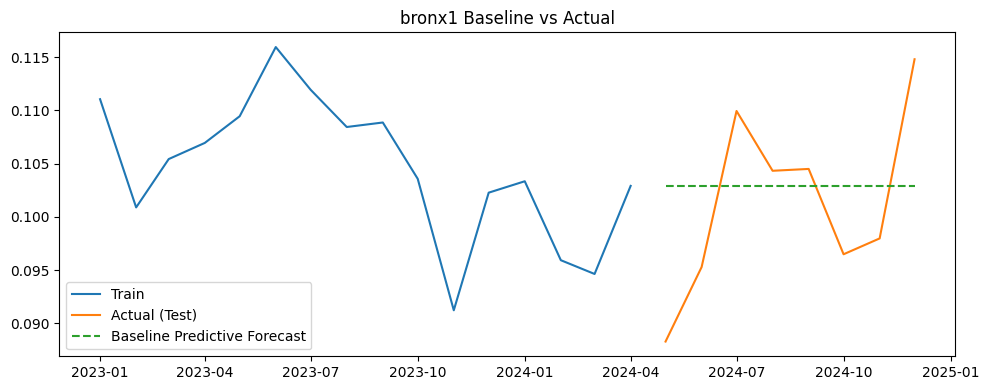

MONTH
2024-05-01    0.102903
2024-06-01    0.102903
2024-07-01    0.102903
2024-08-01    0.102903
2024-09-01    0.102903
2024-10-01    0.102903
2024-11-01    0.102903
2024-12-01    0.102903
dtype: float64

In [ ]:
baseline_pred = pd.Series(train.iloc[-1], index=test.index)
rmse_baseline = np.sqrt(mean_squared_error(test,baseline_pred))


print(f"Baseline RMSE: {rmse_baseline:,.3f}")

plt.figure(figsize=(10,4))
plt.plot(train, label="Train")
plt.plot(test, label="Actual (Test)", color="#ff7f0e")
plt.plot(baseline_pred, label="Baseline Predictive Forecast", color="#2ca02c", linestyle="--")
plt.title(f"{user_input} Baseline vs Actual")
plt.legend()
plt.tight_layout()
plt.show()
